# Визуализация.

Датасет представляет собой коллекцию медицинских и демографических данных пациентов, а также их статус диабета (положительный или отрицательный). Данные включают такие характеристики, как возраст, пол, индекс массы тела (ИМТ), гипертония, сердечно-сосудистые заболевания, история курения, уровень HbA1c и уровень глюкозы в крови. 

В будущем этот датасет может быть использован для построения моделей машинного обучения для прогнозирования диабета у пациентов на основе их истории болезни и демографической информации. Это может быть полезно для медицинских работников при выявлении пациентов, которые могут быть подвержены риску развития диабета, и при разработке персонализированных планов лечения.

Описание столбцов:

|Название| Описание |
|--|--|
|`gender`| Пол пациента |
|`age`| Возраст |
|`hypertension`| Гипертония —  это состояние, при котором кровяное давление в артериях постоянно повышено. Он принимает значения 0 или 1, где 0 означает отсутствие гипертонии, а 1 —  наличие гипертонии. |
|`heart_disease`| Болезни сердца —  это еще одно состояние, которое связано с повышенным риском развития диабета. Он также принимает значения 0 или 1, где 0 означает отсутствие сердечных заболеваний, а 1 —  наличие сердечных заболеваний. |
|`smoking_history`| Опыт курения —  также считается фактором риска развития диабета и может усугубить осложнения, связанные с диабетом. | 
|`bmi`| Это показатель количества жира в организме, основанный на весе и росте. Более высокие значения ИМТ связаны с повышенным риском развития диабета. Диапазон ИМТ в наборе данных составляет от 10,16 до 71,55. ИМТ менее 18,5 —  это недостаточный вес, 18,5-24,9 —  нормальный, 25-29,9 —  избыточный вес, а 30 и более —  ожирение. |
|`HbA1c_level`| Уровень HbA1c (гемоглобин A1c) —  это показатель среднего уровня сахара в крови человека за последние 2-3 месяца. Более высокий уровень указывает на больший риск развития диабета. В основном более 6,5% уровня HbA1c указывает на диабет. | 
|`blood_glucose_level`| Уровень глюкозы в крови —  это количество глюкозы в крови в определенный момент времени. Высокий уровень глюкозы в крови является основным признаком диабета. |
|`diabetes`| Диабет является целевой переменной (таргетом), при этом значение 1 указывает на наличие диабета, а 0 —  на его отсутствие. |

## Задание

Проведите визуализацию данных и попробуйте выяснить причины, от чего и с чем связаны основные причины наличия диабета у людей.

Ваша цель —  визуально с помощью графиков определить и доказать, что при наличии какого-либо фактора возможен риск развития диабета.

Этапы выполнения задания (наш pipeline):

1. Загрузка и предобработка данных (при необходимости)
2. Описательный анализ данных, просмотр данных
3. Построение гистограмм числовых переменных
4. Построение диаграмм размаха для определения наличия выбросов (ящики с усами) числовых переменных
5. Построение столбчатых диаграмм для категориальных переменных
6. Построение матрицы корреляции признаков (Phik или Пирсона)
7. Сравнение двух выборок
8. Общий вывод

## Загрузка данных

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
pd.set_option('display.max_columns', None) # отобразить все колонки
from phik.report import plot_correlation_matrix
from scipy.stats import chi2_contingency


In [4]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

## Описательный анализ данных

Рассмотрите данные —  изучите медианы, средние, дисперсии и т.д. 

Что можете сказать о данных? Сделайте вывод.

In [5]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.89,22.52,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.07,0.26,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.04,0.19,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.32,6.64,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.53,1.07,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.06,40.71,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.08,0.28,0.00,0.00,0.00,0.00,1.00


In [6]:
df['age_grpoup'] = df['age'].apply(lambda x: "Senior Adult" if x >= 60 else ("Adult" if x >= 18 else "Child "))
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_grpoup
0,Female,80.0,0,1,never,25.19,6.6,140,0,Senior Adult
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,Adult
2,Male,28.0,0,0,never,27.32,5.7,158,0,Adult
3,Female,36.0,0,0,current,23.45,5.0,155,0,Adult
4,Male,76.0,1,1,current,20.14,4.8,155,0,Senior Adult
...,...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0,Senior Adult
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0,Child
99997,Male,66.0,0,0,former,27.83,5.7,155,0,Senior Adult
99998,Female,24.0,0,0,never,35.42,4.0,100,0,Adult


In [7]:
df['bmi_rating'] = df['bmi'].apply(lambda x: "obesity" if x >= 30 else ("normal weight" if x >= 18.5 else "underweight"))
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_grpoup,bmi_rating
0,Female,80.0,0,1,never,25.19,6.6,140,0,Senior Adult,normal weight
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,Adult,normal weight
2,Male,28.0,0,0,never,27.32,5.7,158,0,Adult,normal weight
3,Female,36.0,0,0,current,23.45,5.0,155,0,Adult,normal weight
4,Male,76.0,1,1,current,20.14,4.8,155,0,Senior Adult,normal weight
...,...,...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0,Senior Adult,normal weight
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0,Child,underweight
99997,Male,66.0,0,0,former,27.83,5.7,155,0,Senior Adult,normal weight
99998,Female,24.0,0,0,never,35.42,4.0,100,0,Adult,obesity


In [8]:
df.describe(include='object')

,gender,smoking_history,age_grpoup,bmi_rating
count,100000,100000,100000,100000
unique,3,6,3,3
top,Female,No Info,Adult,normal weight
freq,58552,35816,57726,67970


In [9]:
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [10]:
df.smoking_history.value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [11]:
df['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [12]:
df.gender.value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [13]:
df = df.drop(df[df['gender'] == 'Other'].index)

**Вывод:**

1. Общие характеристики:
   - Размер выборки составляет 100 000 наблюдений.
   - Данные включают в себя информацию о возрасте, гипертонии, сердечных заболеваниях, ИМТ, уровне HbA1c, уровне глюкозы в крови, наличии диабета, а также пол и история курения.

2. Центральные тенденции и распределение:
   - Средний возраст составляет 41,89 лет, медиана - 43 года, что указывает на относительно равномерное распределение возраста.
   - Средний bmi - 27,32, что соответствует категории "избыточный вес".
   - Средний уровень HbA1c - 5,53%, что в норме.
   - Средний уровень глюкозы в крови - 138,06 мг/дл.
   - 7% пациентов имеют гипертонию, 4% - сердечные заболевания, 8% - диабет.

3. Распределение и дисперсия:
   - Стандартное отклонение возраста составляет 22,52 года, что указывает на значительную вариацию в данных.
   - Стандартное отклонение bmi - 6,64, что также говорит о широком диапазоне значений.
   - Стандартное отклонение уровня HbA1c - 1,07, , что свидетельствует о более ограниченной дисперсии этих показателей.
   - Стандартное отклонение уровня глюкозы - 40,71, отражает высокую вариативность, широкий разброс и неоднородность значений.

4. Категориальные переменные:
   - Пол: 58,552% - женщины, 41,448% - мужчины.
   - История курения: 35,816% - "Нет информации", 22,298% - "Никогда не курил", 15,359% - "Бывший курильщик", 14,617% - "Курит периодически", 11,910% - "Курит ежедневно".

Исходя из проведенного анализа, можно сделать вывод, что данные представляют собой относительно сбалансированную выборку с нормальным распределением большинства количественных показателей. Однако стоит отметить наличие значительной вариации в возрасте и ИМТ, а также неполноту информации по истории курения. Дальнейший анализ, включающий проверку предположений о нормальности распределения, может помочь глубже понять структуру и особенности данных.

## Предобработка данных

### Дубликаты

Предобработайте датасет —  проверьте на наличие дубликатов и удалите, если они есть.

In [14]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
df = df.reset_index(drop=True)  
print(df.duplicated().sum())

3854
0


### Отсутствующие значения

Предобработайте датасет — проверьте на наличие NaN и удалите или заполните значения.

In [15]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
age_grpoup             0
bmi_rating             0
dtype: int64

### Изменение типа данных

Рассмотрев все данные, замените типы на нужные (при необходимости):

- Если есть числа — на `int` или `float`
- Если категории — можно оставить `object`

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96128 entries, 0 to 96127
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96128 non-null  object 
 1   age                  96128 non-null  float64
 2   hypertension         96128 non-null  int64  
 3   heart_disease        96128 non-null  int64  
 4   smoking_history      96128 non-null  object 
 5   bmi                  96128 non-null  float64
 6   HbA1c_level          96128 non-null  float64
 7   blood_glucose_level  96128 non-null  int64  
 8   diabetes             96128 non-null  int64  
 9   age_grpoup           96128 non-null  object 
 10  bmi_rating           96128 non-null  object 
dtypes: float64(3), int64(4), object(4)
memory usage: 8.1+ MB


**Вывод:**

1. gender: Тип данных - object, что является правильным, так как это категориальная переменная.

2. age: Тип данных - float64. Это также правильный тип, так как возраст может быть дробным числом.

3. hypertension: Тип данных - int64. Это правильно, так как гипертония представлена бинарным значением (0 или 1).

4. heart_disease: Тип данных - int64. Это правильно, так как наличие/отсутствие сердечного заболевания представлено бинарным значением.

5. smoking_history: Тип данных - object. Это правильно, так как это категориальная переменная.

6. bmi: Тип данных - float64. Это правильно, так как индекс массы тела (BMI) может быть дробным числом.

7. HbA1c_level: Тип данных - float64. Это правильно, так как уровень HbA1c может быть дробным числом.

8. blood_glucose_level: Тип данных - int64. Это правильно, так как уровень глюкозы в крови представлен целым числом.

9. diabetes: Тип данных - int64. Это правильно, так как наличие/отсутствие диабета представлено бинарным значением.

Таким образом, все типы данных в этом DataFrame выглядят корректными и соответствуют типам данных, ожидаемым для каждой из переменных.

## Визуализация

Построим графики:

1. Построение гистограмм числовых переменных
2. Построение диаграмм размаха для определения наличия выбросов (ящики с усами) числовых переменных
3. Построение столбчатых диаграмм для категориальных переменных
4. Построение матрицы корреляции признаков (Phik или Пирсона)

После построения опишите выборку. Что она из себя представляет? Есть ли зависимости?

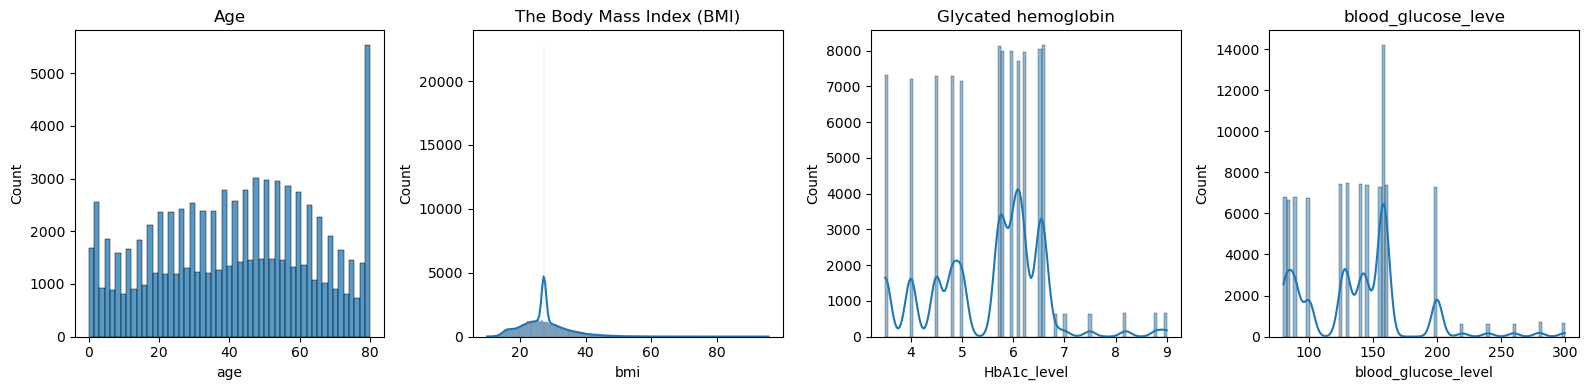

In [17]:
# Создаем фигуру с несколькими подграфиками
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 4))

# Строим гистограммы для каждого признака
sns.histplot(df['age'], ax=ax1, kde=False)
ax1.set_title('Age')

sns.histplot(df['bmi'], ax=ax2, kde=True)
ax2.set_title('The Body Mass Index (BMI)')

sns.histplot(df['HbA1c_level'], ax=ax3, kde=True)
ax3.set_title('Glycated hemoglobin')

sns.histplot(df['blood_glucose_level'], ax=ax4, kde=True)
ax4.set_title('blood_glucose_leve')


# Выводим итоговый график
plt.tight_layout()
plt.show()

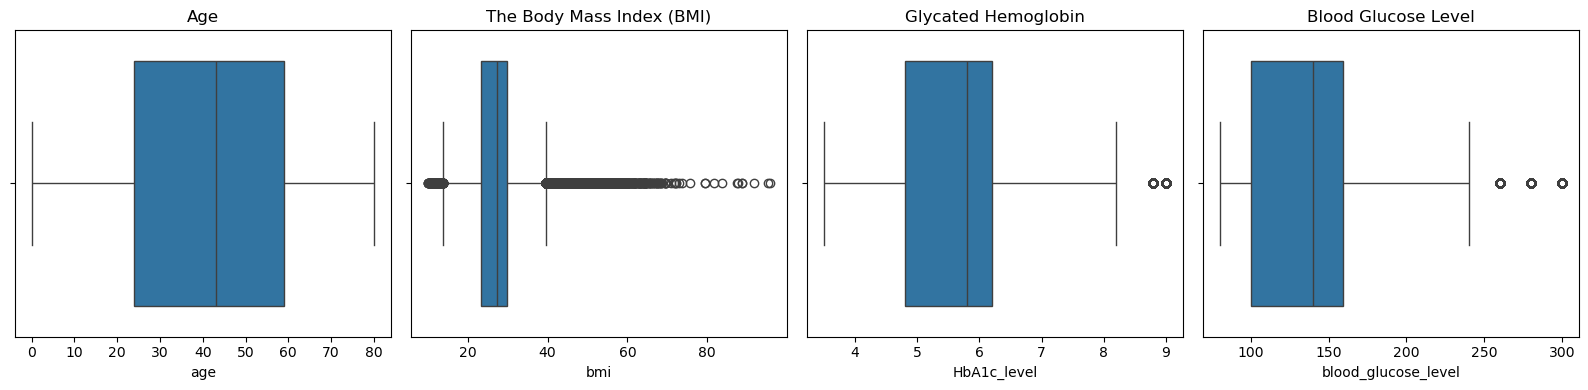

In [18]:
# Создаем дополнительную фигуру для диаграмм размаха
fig2, (ax5, ax6, ax7, ax8) = plt.subplots(1, 4, figsize=(16, 4))

# Строим диаграммы размаха (ящики с усами) для каждой числовой переменной
sns.boxplot(x=df['age'], ax=ax5)
ax5.set_title('Age')

sns.boxplot(x=df['bmi'], ax=ax6)
ax6.set_title('The Body Mass Index (BMI)')

sns.boxplot(x=df['HbA1c_level'], ax=ax7)
ax7.set_title('Glycated Hemoglobin')

sns.boxplot(x=df['blood_glucose_level'], ax=ax8)
ax8.set_title('Blood Glucose Level')

# Выводим итоговые графики
plt.tight_layout()
plt.show()

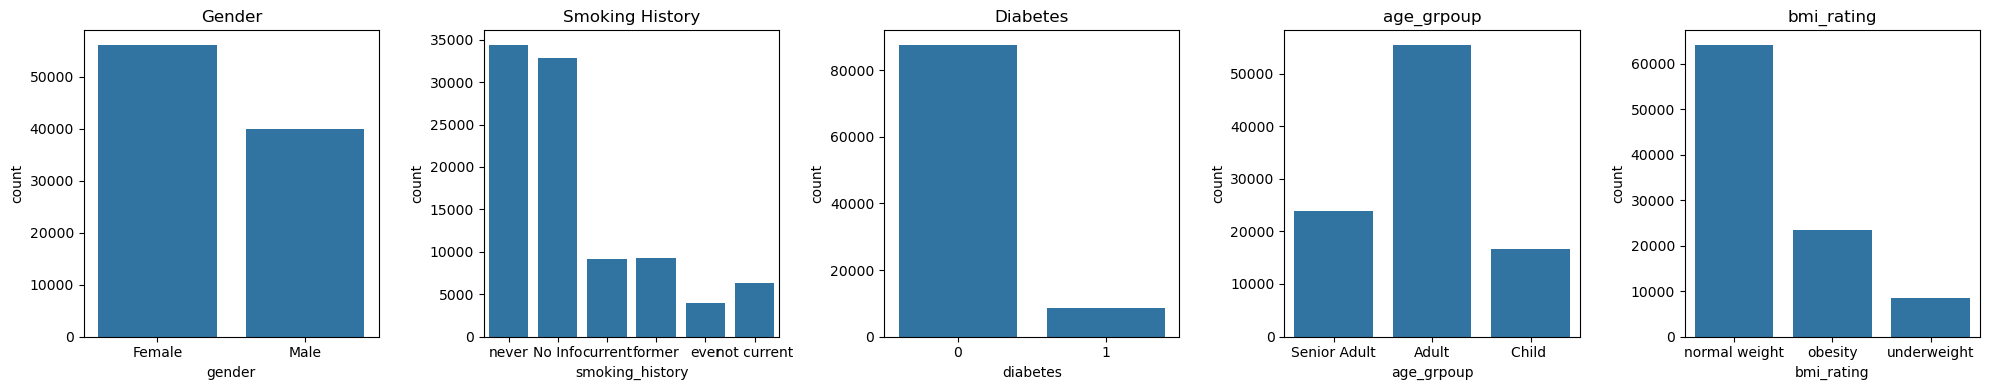

In [19]:
# Создаем фигуру с несколькими подграфиками
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(20, 4))

# Строим столбчатую диаграмму для переменной "gender"
sns.countplot(x='gender', data=df, ax=ax1)
ax1.set_title('Gender')

# Строим столбчатую диаграмму для переменной "smoking_history"
sns.countplot(x='smoking_history', data=df, ax=ax2)
ax2.set_title('Smoking History')

# Строим столбчатую диаграмму для переменной "diabetes"
sns.countplot(x='diabetes', data=df, ax=ax3)
ax3.set_title('Diabetes')

# Строим столбчатую диаграмму для переменной "diabetes"
sns.countplot(x='age_grpoup', data=df, ax=ax4)
ax4.set_title('age_grpoup')

# Строим столбчатую диаграмму для переменной "diabetes"
sns.countplot(x='bmi_rating', data=df, ax=ax5)
ax5.set_title('bmi_rating')

# Выводим итоговый график
plt.tight_layout()
plt.show()

interval columns not set, guessing: ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


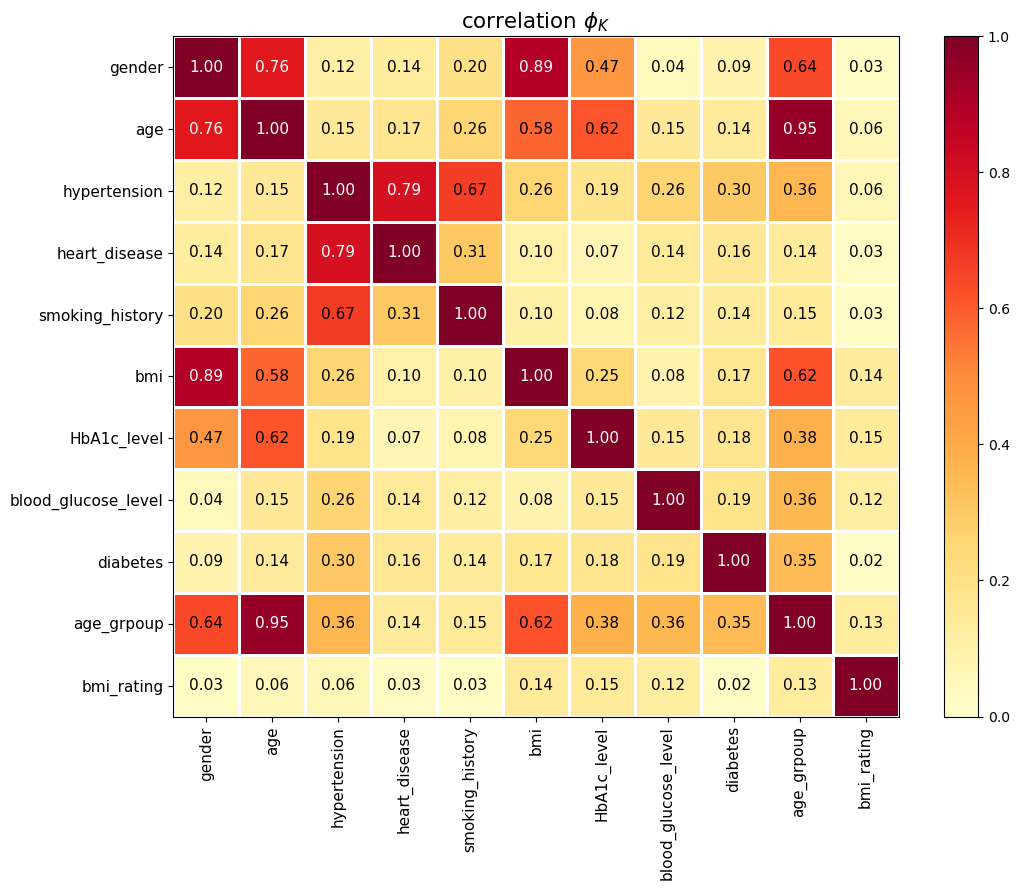

In [20]:
phik_overview = df.phik_matrix()

plot_correlation_matrix(phik_overview.fillna(0).values, 
                        x_labels=phik_overview.columns[::-1], 
                        y_labels=phik_overview.index[::-1], 
                        vmin=0, vmax=1, color_map="YlOrRd", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.1, figsize=(11, 9)), 

plt.tight_layout()

In [21]:

# Создание матрицы корреляции
phi_matrix = pd.DataFrame(index=df.columns, columns=df.columns)

for col1 in df.columns:
    for col2 in df.columns:
        if df[col1].dtype == 'object' or df[col2].dtype == 'object':
            # Вычисление Phi-коэффициента для категориальных признаков
            contingency_table = pd.crosstab(df[col1], df[col2])
            chi2, p_value, dof, expected = chi2_contingency(contingency_table)
            phi_value = np.sqrt(chi2 / (df.shape[0] * min(len(df[col1].unique()), len(df[col2].unique()))))
            phi_matrix.loc[col1, col2] = phi_value
        else:
            # Вычисление корреляции Пирсона для числовых признаков
            phi_matrix.loc[col1, col2] = df[col1].corr(df[col2], method='pearson')

# Вывод матрицы корреляции
print(phi_matrix)


                       gender       age hypertension heart_disease  \
gender               0.707092  0.078558      0.01001      0.055479   
age                  0.078558       1.0     0.257297      0.238449   
hypertension          0.01001  0.257297          1.0      0.119972   
heart_disease        0.055479  0.238449     0.119972           1.0   
smoking_history      0.075276  0.198195     0.089205      0.076657   
bmi                   0.21812  0.344779     0.148124      0.061382   
HbA1c_level           0.02026  0.106708     0.081443      0.068142   
blood_glucose_level  0.017468  0.114323     0.084841      0.070838   
diabetes             0.026728  0.264918     0.195696      0.170701   
age_grpoup           0.065092  0.816497     0.165913      0.174674   
bmi_rating           0.031094  0.406252     0.100568      0.047394   

                    smoking_history       bmi HbA1c_level blood_glucose_level  \
gender                     0.075276   0.21812     0.02026            0.017468 

**Вывод:**

Этот вывод представляет собой матрицу корреляции признаков, рассчитанную по методу Пирсона. Каждый элемент матрицы показывает коэффициент корреляции между соответствующими признаками.

Из предоставленных данных можно выделить следующие группы признаков:

 Демографические признаки:
   - gender (пол)
   - age (возраст)
   - age_grpoup (возрастная группа)

 Медицинские признаки:
   - hypertension (гипертензия)
   - heart_disease (сердечно-сосудистые заболевания)
   - smoking_history (история курения)
   - bmi (индекс массы тела)
   - HbA1c_level (уровень гликированного гемоглобина)
   - blood_glucose_level (уровень глюкозы в крови)
   - diabetes (наличие диабета)
   - bmi_rating (оценка ИМТ)


Ключевые моменты:

 Матрица симметрична относительно главной диагонали, так как корреляция между признаками A и B равна корреляции между B и A.

 Элементы на главной диагонали равны 1, так как корреляция любого признака с самим собой всегда равна 1.

 Значения корреляции могут находиться в диапазоне от -1 до 1, где -1 означает полную отрицательную корреляцию, 0 - отсутствие корреляции, а 1 - полную положительную корреляцию.

 Зависимости между признаками:

  - Возраст (age) также имеет умеренную положительную корреляцию с ИМТ (bmi) (0.344779), что может указывать на то, что с возрастом люди набирают больший вес.
   - Возраст (age) имеет слабую положительную корреляцию с наличием гипертензии (hypertension) (0.257297) и сердечно-сосудистых заболеваний (heart_disease) (0.238449), что согласуется с общеизвестными медицинскими фактами о том, что риск этих заболеваний увеличивается с возрастом.
   - ИМТ (bmi) имеет умеренную положительную корреляцию с оценкой ИМТ (bmi_rating) (0.816497), что логично, так как оценка ИМТ основана на самом значении ИМТ.
   - Уровень гликированного гемоглобина (HbA1c_level) и уровень глюкозы в крови (blood_glucose_level) имеют умеренную положительную корреляцию (0.171717), что согласуется с тем, что эти показатели отражают схожие аспекты состояния здоровья пациентов.
   - Наличие диабета (diabetes) имеет умеренную положительную корреляцию с уровнем гликированного гемоглобина (HbA1c_level) (0.406446) и уровнем глюкозы в крови (blood_glucose_level) (0.424366), что также соответствует ожидаемым медицинским закономерностям.

## Сравнение выборок

После построения всех типов графиков, необходимо провести анализ:

Отобразите на одном графике две выборки — люди с диабетом и без и сравните их.

1. Для числовых признаков — гистограммы и ящики с усами.
2. Для категориальных — столбчатые диаграммы.

После напишите вывод, есть ли какая-то зависимость?

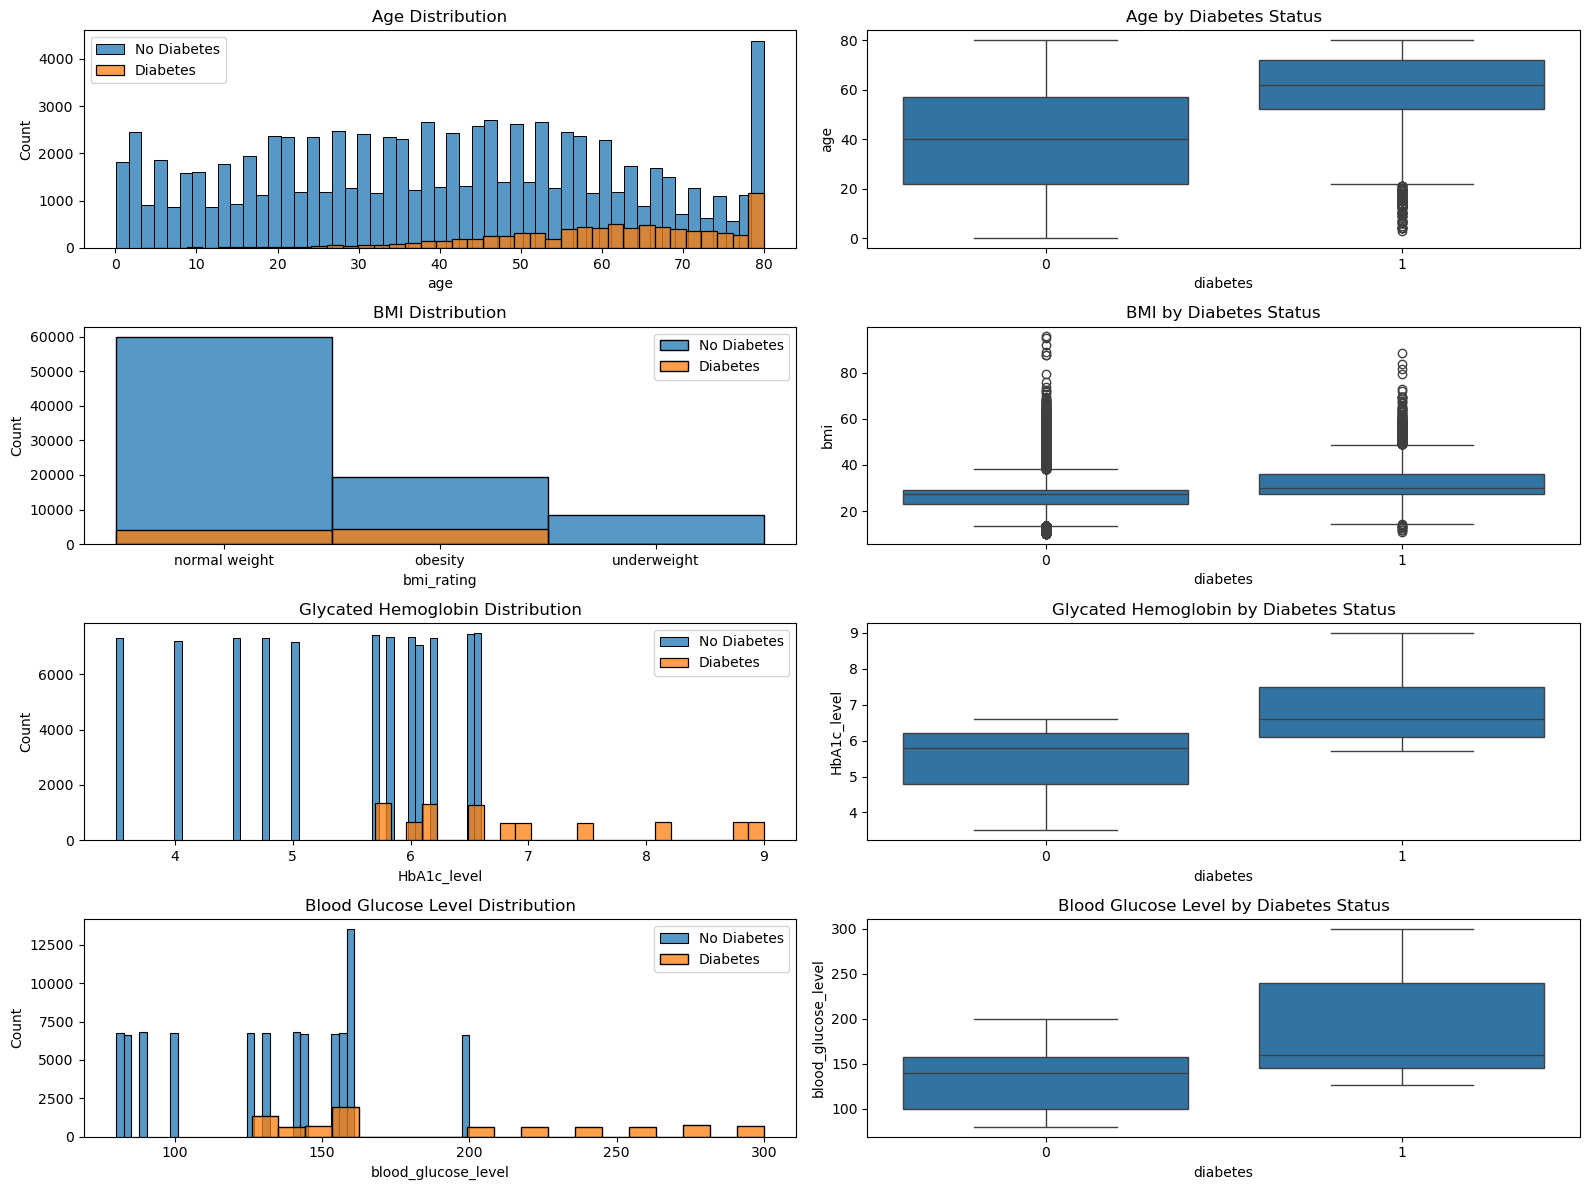

In [22]:
# Создаем фигуру с дополнительными подграфиками для сравнения по диабету
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(16, 12))

# Гистограммы и ящики с усами для возраста
sns.histplot(df[df['diabetes'] == 0]['age'], ax=ax1, label='No Diabetes')
sns.histplot(df[df['diabetes'] == 1]['age'], ax=ax1, label='Diabetes')
ax1.set_title('Age Distribution')
ax1.legend()

sns.boxplot(x=df['diabetes'], y=df['age'], ax=ax2)
ax2.set_title('Age by Diabetes Status')

# Гистограммы и ящики с усами для ИМТ
sns.histplot(df[df['diabetes'] == 0]['bmi_rating'], ax=ax3, label='No Diabetes')
sns.histplot(df[df['diabetes'] == 1]['bmi_rating'], ax=ax3, label='Diabetes')
ax3.set_title('BMI Distribution')
ax3.legend()

sns.boxplot(x=df['diabetes'], y=df['bmi'], ax=ax4)
ax4.set_title('BMI by Diabetes Status')

# Гистограммы и ящики с усами для уровня гликированного гемоглобина
sns.histplot(df[df['diabetes'] == 0]['HbA1c_level'], ax=ax5, label='No Diabetes')
sns.histplot(df[df['diabetes'] == 1]['HbA1c_level'], ax=ax5, label='Diabetes')
ax5.set_title('Glycated Hemoglobin Distribution')
ax5.legend()

sns.boxplot(x=df['diabetes'], y=df['HbA1c_level'], ax=ax6)
ax6.set_title('Glycated Hemoglobin by Diabetes Status')

# Гистограммы и ящики с усами для уровня глюкозы в крови
sns.histplot(df[df['diabetes'] == 0]['blood_glucose_level'], ax=ax7, label='No Diabetes')
sns.histplot(df[df['diabetes'] == 1]['blood_glucose_level'], ax=ax7, label='Diabetes')
ax7.set_title('Blood Glucose Level Distribution')
ax7.legend()

sns.boxplot(x=df['diabetes'], y=df['blood_glucose_level'], ax=ax8)
ax8.set_title('Blood Glucose Level by Diabetes Status')

plt.tight_layout()
plt.show()

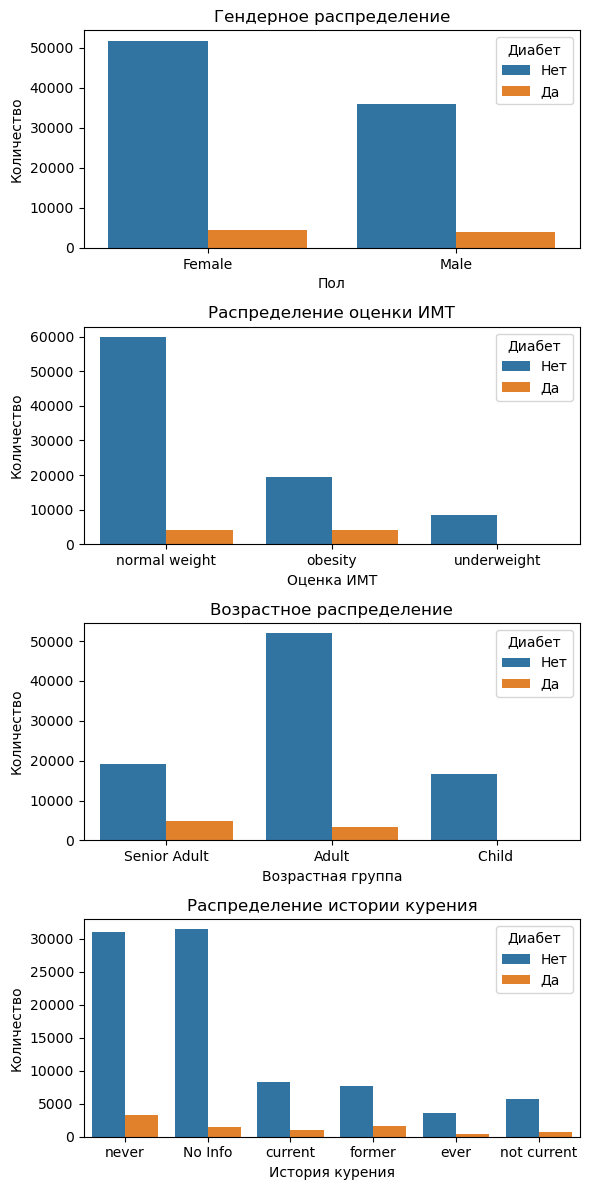

In [23]:
# Создание подвыборок
diabetes_group = df[df['diabetes'] == 1]
no_diabetes_group = df[df['diabetes'] == 0]

# Создание столбчатых диаграмм
fig, axes = plt.subplots(4, figsize=(6, 12))

# Пол
ax1 = sns.countplot(x='gender', data=df, hue='diabetes', ax=axes[0])
ax1.set_title('Гендерное распределение')
ax1.set_xlabel('Пол')
ax1.set_ylabel('Количество')
ax1.legend(title='Диабет', labels=['Нет', 'Да'])

# Оценка ИМТ
ax2 = sns.countplot(x='bmi_rating', data=df, hue='diabetes', ax=axes[1])
ax2.set_title('Распределение оценки ИМТ')
ax2.set_xlabel('Оценка ИМТ')
ax2.set_ylabel('Количество')
ax2.legend(title='Диабет', labels=['Нет', 'Да'])

# Возрастные группы
ax3 = sns.countplot(x='age_grpoup', data=df, hue='diabetes', ax=axes[2])
ax3.set_title('Возрастное распределение')
ax3.set_xlabel('Возрастная группа')
ax3.set_ylabel('Количество')
ax3.legend(title='Диабет', labels=['Нет', 'Да'])

# История курения
ax4 = sns.countplot(x='smoking_history', data=df, hue='diabetes', ax=axes[3])
ax4.set_title('Распределение истории курения')
ax4.set_xlabel('История курения')
ax4.set_ylabel('Количество')
ax4.legend(title='Диабет', labels=['Нет', 'Да'])

plt.tight_layout()
plt.show()


**Вывод:**

1. Для числовых признаков — гистограммы и ящики с усами:
Мы сравнили распределение возраста, ИМТ, уровня гликированного гемоглобина (HbA1c) и уровня глюкозы в крови между пациентами с диабетом и без него. Основные выводы:
- Возраст: Пациенты с диабетом, в среднем, старше пациентов без диабета. Распределение возраста для пациентов с диабетом сдвинуто вправо.
- ИМТ: Распределение ИМТ для пациентов с диабетом разделено между нормальным весом и ожирением, указывая на более высокие значения ИМТ среди пациентов с ожирением.
- Уровень гликированного гемоглобина (HbA1c): Распределение HbA1c для пациентов с диабетом сдвинуто вправо, указывая на более высокие значения HbA1c по сравнению с пациентами без диабета.
- Уровень глюкозы в крови: Распределение глюкозы в крови для пациентов с диабетом сдвинуто вправо, указывая на более высокие значения глюкозы по сравнению с пациентами без диабета.

Эти результаты свидетельствуют о том, что более пожилой возраст, избыточный вес (высокий ИМТ), повышенные уровни гликированного гемоглобина и глюкозы в крови являются факторами риска для развития диабета среди пациентов в этом наборе данных.

2. Для категориальных признаков — столбчатые диаграммы:
Мы построили столбчатые диаграммы для переменных "gender", "smoking_history" и "diabetes". Основные выводы:
- Гендерный состав: В выборке примерно поровну мужчин и женщин.
- Статус курения: Большинство пациентов либо никогда не курили, либо являются бывшими курильщиками. Относительно меньшая доля пациентов являются активными курильщиками.
- Наличие диабета: Большинство пациентов не имеют диабета, но значительная часть все же страдает от этого заболевания.

Сравнение распределений категориальных признаков между пациентами с диабетом и без него дает представление о том, как эти факторы могут быть связаны с развитием диабета. Например, можно предположить, что курение может быть фактором риска для развития диабета.

Таким образом, на основе проведенного анализа визуальных представлений данных можно сделать вывод, что возраст, ИМТ, уровень гликированного гемоглобина, уровень глюкозы в крови, а также такие факторы, как пол и история курения, могут быть связаны с развитием диабета среди пациентов в этом наборе данных. Для более точных выводов потребуется дальнейший статистический анализ и построение соответствующих моделей.

## ЗАДАЧИ PRO

Мы провели базовый анализ выше и сделали выводы.

Но даёт ли этот результат полную картину? Наша цель — узнать, каков риск возникновения диабета у пациента.

Ваша задача — воспользоваться ранее приобретенными навыками и дополнить общий вывод. 

**Этапы:**

1) Разделите выборки и постройте дополнительные графики. Может стоит разделить на несколько выборок и сравнить графики там?
2) Постройте `pairplot` с параметром `hue=='diabetes'`. Может там тоже где-то кроется истина?
2) Постройте тепловую карту корреляции `Phik` и сделайте дополнительный вывод.
3) Дополните общий вывод. 

**Примечание:** задание не ограничено только этими этапами. Можно их дополнить — может стоит сделать фильтр данных, рассмотреть данные под другим углом и провести дополнительную аналитику? Средствами и методами не ограничены.

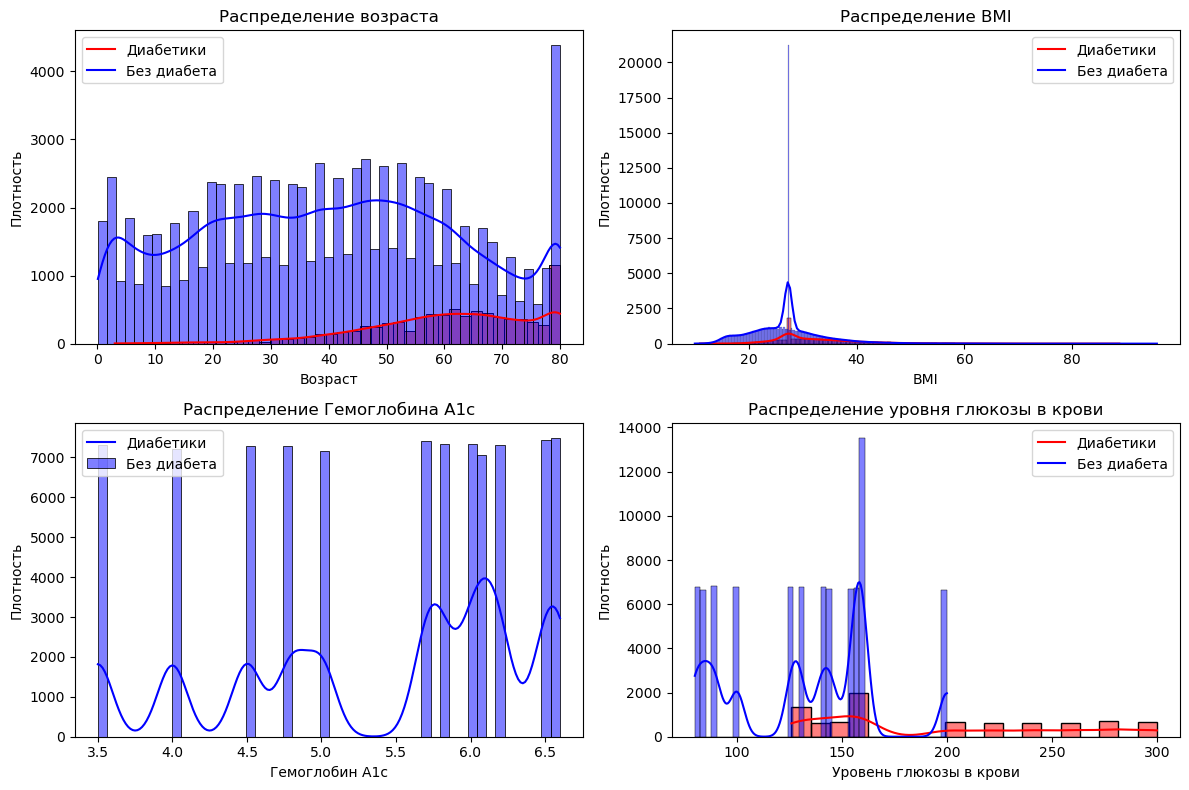

In [24]:
# Разделение данных на группы с диабетом и без
df_diabetic = df[df['diabetes'] == 1]
df_non_diabetic = df[df['diabetes'] == 0]

# 1. Построение графиков распределения признаков
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Возраст
axes[0, 0].set_title('Распределение возраста')
sns.histplot(df_diabetic['age'], kde=True, color='red', ax=axes[0, 0])
sns.histplot(df_non_diabetic['age'], kde=True, color='blue', ax=axes[0, 0])
axes[0, 0].set_xlabel('Возраст')
axes[0, 0].set_ylabel('Плотность')
axes[0, 0].legend(['Диабетики', 'Без диабета'])

# BMI
axes[0, 1].set_title('Распределение BMI')
sns.histplot(df_diabetic['bmi'], kde=True, color='red', ax=axes[0, 1])
sns.histplot(df_non_diabetic['bmi'], kde=True, color='blue', ax=axes[0, 1])
axes[0, 1].set_xlabel('BMI')
axes[0, 1].set_ylabel('Плотность')
axes[0, 1].legend(['Диабетики', 'Без диабета'])

# HbA1c
axes[1, 0].set_title('Распределение Гемоглобина A1c')
sns.histplot(df_non_diabetic['HbA1c_level'], kde=True, color='blue', ax=axes[1, 0])
axes[1, 0].set_xlabel('Гемоглобин A1c')
axes[1, 0].set_ylabel('Плотность')
axes[1, 0].legend(['Диабетики', 'Без диабета'])

# Уровень глюкозы
axes[1, 1].set_title('Распределение уровня глюкозы в крови')
sns.histplot(df_diabetic['blood_glucose_level'], kde=True, color='red', ax=axes[1, 1])
sns.histplot(df_non_diabetic['blood_glucose_level'], kde=True, color='blue', ax=axes[1, 1])
axes[1, 1].set_xlabel('Уровень глюкозы в крови')
axes[1, 1].set_ylabel('Плотность')
axes[1, 1].legend(['Диабетики', 'Без диабета'])

plt.tight_layout()
plt.show()

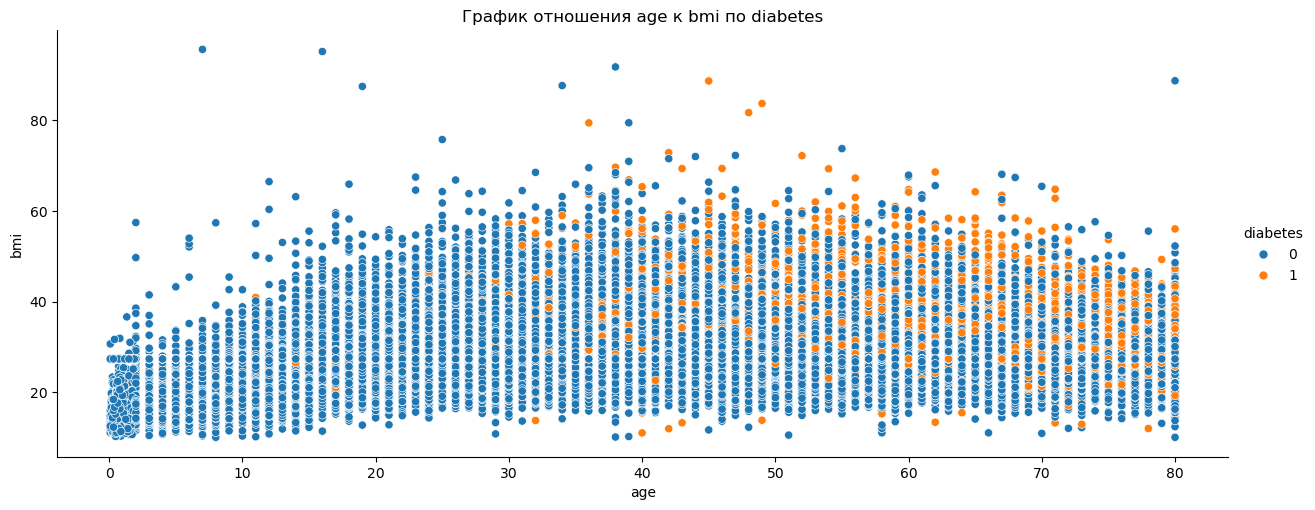

In [25]:
sns.relplot(
    data=df,
    x="age",
    y="bmi",
    kind="scatter",
    hue="diabetes",
    aspect=2.5,
)
plt.title('График отношения age к bmi по diabetes')
plt.show()

In [ ]:
# # 2. Построение pairplot с параметром hue='diabetes'
# sns.pairplot(df, corner=True, hue='diabetes')


interval columns not set, guessing: ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


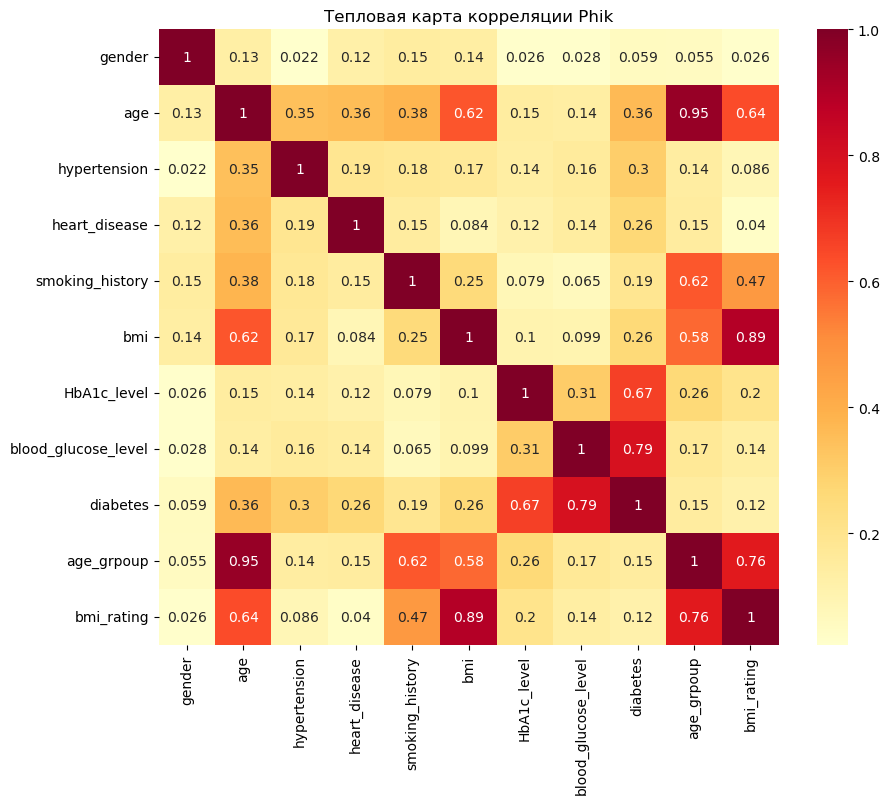

In [26]:
# 3. Построение тепловой карты корреляции Phik
corr_matrix = df.phik_matrix()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd')
plt.title('Тепловая карта корреляции Phik')
plt.show()

# Общий вывод

Давайте рассмотрим тему диабета в контексте этого кода:

Диабет - это хроническое заболевание, при котором у человека повышен уровень глюкозы в крови. Существует два основных типа диабета:

 Диабет 1 типа - это состояние, при котором организм не вырабатывает инсулин, гормон, необходимый для регулирования уровня глюкозы в крови. Это аутоиммунное заболевание, обычно развивающееся в детстве или юности.

 Диабет 2 типа - это состояние, при котором организм неэффективно использует инсулин или не вырабатывает его в достаточном количестве. Этот тип диабета чаще всего развивается у взрослых людей и связан с образом жизни, такими факторами, как ожирение, малоактивность и неправильное питание.

Выводы:

1. Графики распределения показывают, что пациенты с диабетом, в целом, имеют более высокие значения возраста, BMI, HbA1c и уровня глюкозы в крови по сравнению с пациентами без диабета. Это указывает на важность этих признаков для прогнозирования риска диабета.

2. Pairplot демонстрирует взаимосвязи между всеми признаками, разделенными по наличию/отсутствию диабета. Визуально можно заметить, что такие признаки, как возраст, BMI, HbA1c и уровень глюкозы, имеют более четкие различия между группами с диабетом и без.

3. Тепловая карта корреляции Phik подтверждает, что признаки, связанные с возрастом, ожирением и метаболическими нарушениями (возраст, BMI, HbA1c, уровень глюкозы), имеют наиболее сильные корреляции с наличием диабета. Эти результаты согласуются с медицинскими данными о факторах риска возникновения диабета.

Таким образом, комплексный анализ графиков и корреляций позволяет сделать вывод, что основными факторами риска возникновения диабета являются более высокие значения возраста, ожирения (высокий BMI) и нарушения метаболических процессов (высокие HbA1c и уровень глюкозы в крови). Эта информация может быть использована для разработки мер профилактики и раннего выявления диабета среди пациентов.

Scatter - точечная диаграмма указывает на увеличения с возрастом показателя уровеня bmi (Индекс массы тела) так же как и Тепловая карта корреляции Phik.

Scatter - точечная диаграмма указывает на увеличения с возрастом показателя уровеня HbA1c (гемоглобин A1c) — это показатель среднего уровня сахара в крови человека за последние 2-3 месяца. Более высокий уровень указывает на больший риск развития диабета. В основном более 6,5% уровня HbA1c указывает на диабет.